Turns out you can query arbitrary filesystems with SQL. This notebook shows how to query IPFS with DuckDB.

The gist of it is that you can register any `fsspec` filesystem on DuckDB. As IPFS is supported by `fsspec` via [`ipfsspec`](https://github.com/fsspec/ipfsspec), we can register it and query it with SQL.

Before running this code, you'll need to install `ipfsspec`. You can do so with:

```bash
pip install git+https://github.com/fsspec/ipfsspec
```

In [2]:
#| echo: false
#| output: false
%pip install git+https://github.com/fsspec/ipfsspec --quiet


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import duckdb
from ipfsspec import AsyncIPFSFileSystem

ipfs_fs = AsyncIPFSFileSystem()

duckdb.register_filesystem(ipfs_fs)


Once the filesystem is registered, you can use specific URIs inside `read_csv_auto` or `read_parquet`!

A couple of examples:

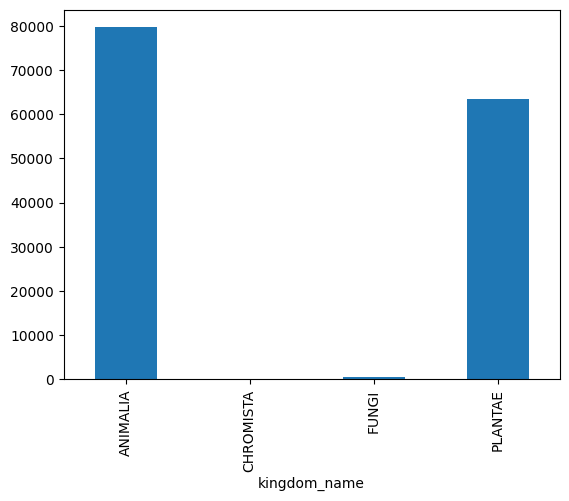

In [4]:
_ = (
    duckdb.sql(
        "select * from read_csv_auto('ipfs://bafybeif5reawvqtsoybj5fhdl4ghaq3oc7kzepuws26zawkjm4johlv3uq')"
    )
    .df()
    .groupby("kingdom_name")["taxonid"]
    .count()
    .plot.bar()
)


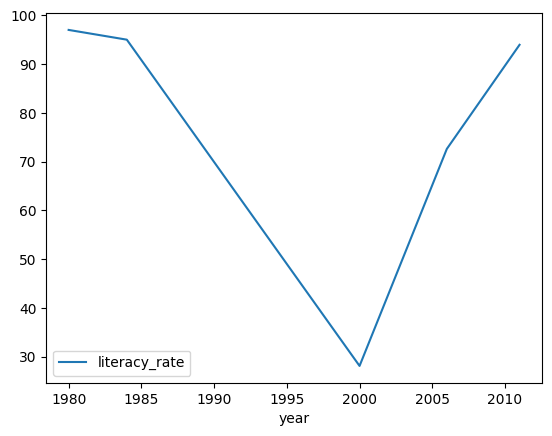

In [5]:
_ = (
    duckdb.query(
        "select * from read_parquet('ipfs://bafkreibnx5q6qwxobozkdm6xt7ktvwciyfvtkgy7fud67w5oyxnf5tch4e') limit 10"
    )
    .df()
    .groupby("year")
    .mean("literacy_rate")
    .plot()
)
